In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
from classifiers.kernel import Kernel

In [4]:
kernel = Kernel('Pauli', reps=1)

In [5]:
"""from qiskit import IBMQ
if IBMQ.active_account() is None:
    IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-kaist', group='internal', project='default')
backend = provider.get_backend('ibmq_qasm_simulator')
backend"""

"from qiskit import IBMQ\nif IBMQ.active_account() is None:\n    IBMQ.load_account()\nprovider = IBMQ.get_provider(hub='ibm-q-kaist', group='internal', project='default')\nbackend = provider.get_backend('ibmq_qasm_simulator')\nbackend"

In [6]:
from qiskit.circuit.library import PauliFeatureMap
PauliFeatureMap(2, reps=1).draw()

┌───┐┌─────────────┐                                          
q_0: ┤ H ├┤ P(2.0*x[0]) ├──■────────────────────────────────────■──
     ├───┤├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐
q_1: ┤ H ├┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
     └───┘└─────────────┘└───┘└──────────────────────────────┘└───┘

In [7]:
from classifiers.convex.svm import BinarySVM

In [8]:
svm = BinarySVM(kernel, C=None, k=10, mutation='REDUCED_QASVM')

In [9]:
from classifiers.datasets.dataloader import Sklearn_DataLoader
from classifiers.datasets.datascaler import DataScaler

In [10]:
np.random.seed(13)
dl = Sklearn_DataLoader('iris', labels=(1, 2))
X, y, Xt, yt = dl(8, true_hot=0)

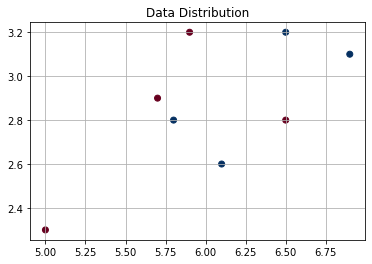

In [11]:
from classifiers.visualization import Plot_Data, Plot_SVM
Plot_Data(X, y).plot()

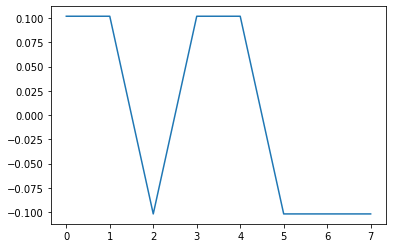

In [12]:
svm.fit(X, y)
plt.plot(svm.f(X))

In [13]:
svm.f(X)

array([ 0.10185871,  0.10185871, -0.10185871,  0.10185871,  0.10185871,
       -0.10185871, -0.10185871, -0.10185872])

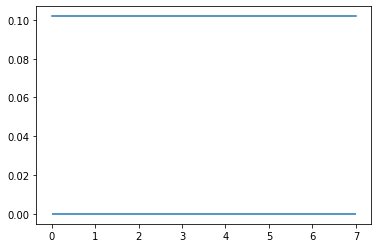

In [14]:
plt.plot(svm.f(X)*svm.polary)
plt.hlines(0, 0, 7)

In [15]:
from classifiers.quantum.qasvm import QASVM
from qiskit.circuit.library import RealAmplitudes, PauliFeatureMap


In [16]:
feature_map = PauliFeatureMap(4, reps=1)
var_form = RealAmplitudes(3, reps=3)

In [17]:
from qiskit.utils import QuantumInstance

In [18]:
from qiskit.providers.aer import AerSimulator
sim_gpu = AerSimulator(method='automatic', device='GPU')
quantum_instance = QuantumInstance(sim_gpu, shots=2**13)

In [35]:
qasvm = QASVM(X, y, num_data_qubits=4, var_form=var_form, quantum_instance = quantum_instance, feature_map = feature_map, C=None, k=10, option='QASVM', initial_point=np.ones(9)).dual

In [36]:
qasvm.first_order_circuit.draw(fold=-1)

┌───┐                                                                                                                                                                                                                                                                                                                                                                                                                             ┌───┐┌─┐
 a_0: ───┤ H ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────■──■─────■──■─┤ H ├┤M├
      ┌──┴───┴───┐                              ┌──────────┐                                                           ┌──────────┐                                                                            ┌──────────┐                                                                                                                                                                                                  │  │     │  │ └───┘└╥┘
 i_0: ┤ RY(θ[0]) ├───────■─────────■────────────┤ RY(θ[3]) ├────────────────────────■─────────────────■────────────────┤ RY(θ[6]) ├───────────────────────────■───────────────────────────────■────────────────┤ RY(θ[9]) ├────────────────────o───────────────────────■───────────────────────o──────────o─────────────────■───────────────────────o───────────────■──────────■─────────o──────────o─────────■──────────■───┼──┼─────┼──┼───────╫─
      ├──────────┤     ┌─┴─┐       │            └──────────┘          ┌──────────┐┌─┴─┐               │                └──────────┘┌──────────┐             ┌─┴─┐                             │                └──────────┘┌───────────┐       │                       │                       │          │                 │                       │               │          │         │          │         │          │   │  │     │  │       ║ 
 i_1: ┤ RY(θ[1]) ├─────┤ X ├───────┼─────────────────■────────────────┤ RY(θ[4]) ├┤ X ├───────────────┼─────────────────────■──────┤ RY(θ[7]) ├─────────────┤ X ├─────────────────────────────┼─────────────────────■──────┤ RY(θ[10]) ├───────o───────────────────────o───────────────────────■──────────■─────────────────■───────────────────────o───────────────o──────────o─────────■──────────■─────────■──────────■───┼──┼─────┼──┼───────╫─
      ├──────────┤     └───┘     ┌─┴─┐             ┌─┴─┐              ├──────────┤└───┘             ┌─┴─┐                 ┌─┴─┐    ├──────────┤             └───┘                           ┌─┴─┐                 ┌─┴─┐    ├───────────┤       │                       │                       │          │                 │                       │               │          │         │          │         │          │   │  │     │  │       ║ 
 i_2: ┤ RY(θ[2]) ├───────────────┤ X ├─────────────┤ X ├──────────────┤ RY(θ[5]) ├──────────────────┤ X ├─────────────────┤ X ├────┤ RY(θ[8]) ├─────────────────────────────────────────────┤ X ├─────────────────┤ X ├────┤ RY(θ[11]) ├───────o───────────────────────o───────────────────────o──────────o─────────────────o───────────────────────■───────────────■──────────■─────────■──────────■─────────■──────────■───┼──┼─────┼──┼───────╫─
      └──────────┘               └───┘             └───┘              └──────────┘                  └───┘                 └───┘    └──────────┘                                             └───┘                 └───┘    └───────────┘┌──────┴───────┐        ┌──────┴───────┐        ┌──────┴───────┐  │          ┌──────┴───────┐        ┌──────┴───────┐┌──────┴───────┐  │  ┌──────┴───────┐  │  ┌──────┴───────┐  │   │  │     │  │       ║ 
xi_0: ───────────────────────────────────────────────────────────────────────────────

In [37]:
print(qasvm.second_order_circuit.depth())

30


In [38]:
import time
start = time.time()

In [39]:
from classifiers.optimizer import SPSA
optimizer = SPSA(qasvm, blocking=False)


In [40]:
from classifiers.callback import CostParamStorage
storage = CostParamStorage(interval=1)


In [51]:
from tqdm.notebook import tqdm

epochs = 2**7
last_avg = 2**4

for epoch in tqdm(range(epochs)):
    optimizer.step(storage)
    if np.all(storage.last_std(last_avg)<5e-2) and epoch>=last_avg:
        break

qasvm.parameters = storage.last_avg(last_avg)

  0%|          | 0/128 [00:00<?, ?it/s]

In [52]:
from classifiers.visualization import compare_svm_and_qasvm

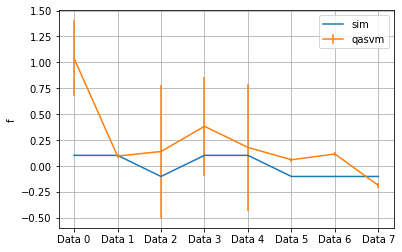

In [53]:
l = compare_svm_and_qasvm(svm, qasvm)

In [54]:
end = time.time()
print((end-start)/3600)

0.3255460713307063


In [55]:
l

array([[ 0.48696289,  0.09665527,  0.04716797,  0.30056152,  0.07736816,
         0.06635742,  0.10288086, -0.1842041 ],
       [ 1.1       ,  0.09040527,  0.01901855,  0.29855957,  0.08276367,
         0.07211914,  0.12456055, -0.19401855],
       [ 1.1       ,  0.09545898,  0.02556152,  0.29677734,  0.09038086,
         0.04377441,  0.12006836, -0.17937012],
       [ 1.1       ,  0.11337891,  0.03972168,  0.30695801,  0.09580078,
         0.04345703,  0.10825195, -0.19355469],
       [ 1.1       ,  0.08134766,  0.0348877 ,  0.31879883,  0.06376953,
         0.06386719,  0.12214355, -0.19196777],
       [ 1.1       ,  0.0875    ,  1.1       ,  0.32111816,  0.05405273,
         0.06755371,  0.11813965, -0.19597168],
       [ 1.1       ,  0.09824219,  0.04570312,  0.30056152,  0.06623535,
         0.04978027,  0.12363281, -0.21533203],
       [ 1.1       ,  0.08120117,  0.03552246,  0.29975586,  0.09299316,
         0.06523437,  0.12041016, -0.17958984],
       [ 1.1       ,  0.11347656

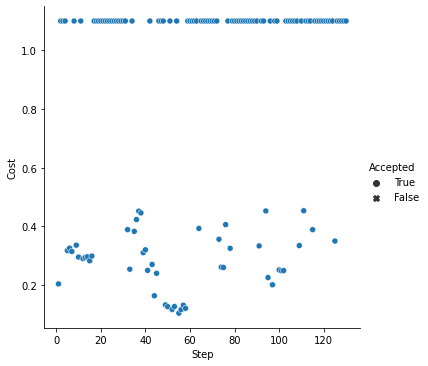

In [56]:
storage.plot()

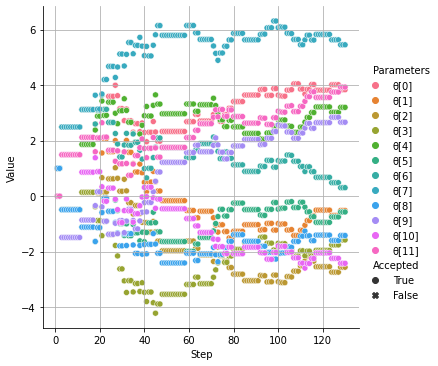

In [57]:
storage.plot_params()

In [58]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.17.1', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.12.3', 'qiskit-aqua': '0.9.1', 'qiskit': '0.25.3', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

In [59]:
0.146*60

8.76

In [60]:
print((end-start)/60)

19.532764279842375
